In [264]:
import numpy as np
import rasterio as rs
import hickle as hkl
import os
import hickle as hkl

In [315]:
path = '../../src/s2tile.npy'
interp = np.load("../../src/interp.npy")
s2 = np.load(path)

path = '../../src/s2tile_left.npy'
interp = np.load("../../src/interp.npy")
s2_left = np.load(path)


In [316]:
s2 = np.concatenate([s2_left, s2], axis = 2)

<AxesSubplot:>

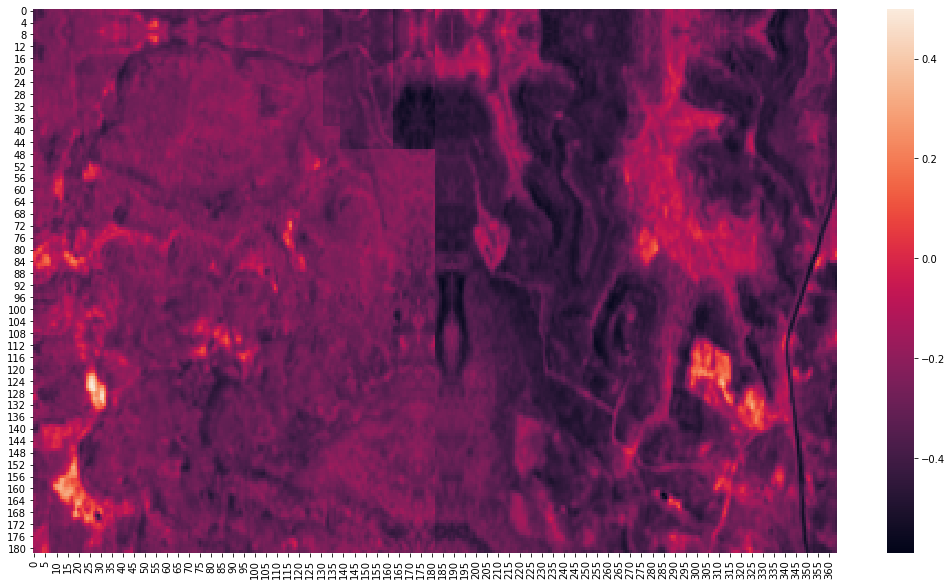

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(18,10))
sns.heatmap(s2[8, ..., 3])

In [120]:
time = 0

interp_i = interp[time]
array_i = s2[time, :, :, :]
adj = (np.median(array_i[interp_i == 0]) -  # 0.2
(np.median(array_i[interp_i == 1]))) / np.median(array_i)

adj = (np.median(s2[interp == 1, 0], axis = 0) - (np.mean(s2[interp == 0, 0], axis = 0))) / np.median(s2[..., 0])

print(adj, np.sum(interp_i) / np.prod(interp_i.shape))

-0.13772816832157167 0.011675867758106478


In [123]:
np.median(interp, axis = (1, 2))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
arr = rs.open("addis.tif").read(1)
arr = arr.astype(np.float32)
arr[arr == 255] = np.nan
arr = arr.reshape((293, 10, 280, 10))
arr = np.nanmean(arr, axis = (1, 3))
np.sum(arr > 10) / np.sum(arr >= 0)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt



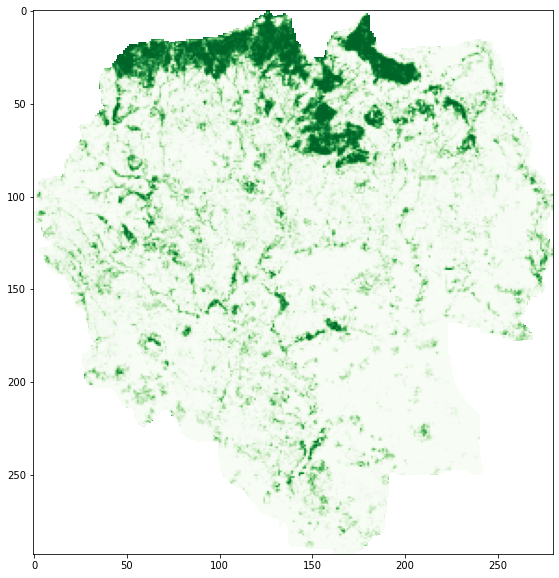

In [27]:
plt.figure(figsize=(20,10))
plt.imshow(arr, cmap='Greens', vmin=0, vmax=100)
plt.show()

/Users/jbrandt.terminal/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


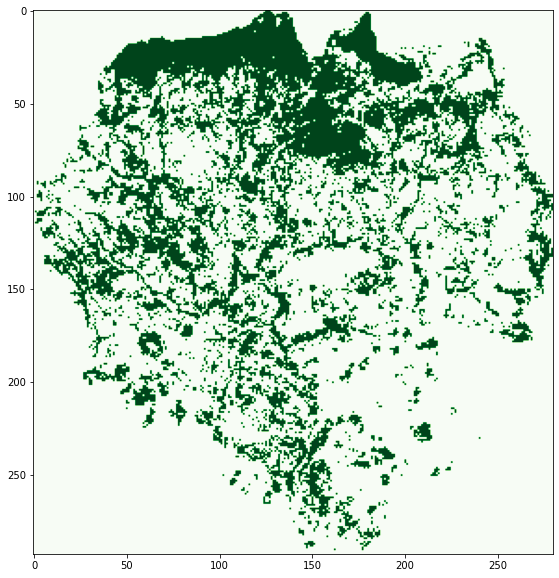

In [29]:
plt.figure(figsize=(20,10))
plt.imshow(arr > 10, cmap='Greens', vmin=0, vmax=1)
plt.show()